In [17]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from poirot.spectrum import specparam_xr
import xarray as xr
import pandas as pd
from fooof import FOOOF, FOOOFGroup
import numpy as np
import seaborn as sb

import seaborn.objects as so
import matplotlib.pyplot as plt

sb.set_style("whitegrid")


def tee(df):
    display(df)
    return df


da = xr.open_dataarray("../data/output/LEMON_power.nc")
da.close()


stacked_columns = ["sub", "roi_names"]

fg = FOOOFGroup(
    peak_width_limits=[2, 8],
    min_peak_height=0.1,
    max_n_peaks=6,
)

freq_range = [2, 48]

df = da.isel(sub=slice(0, 1)).pipe(
    specparam_xr, stacked_columns=["sub", "roi_names"], fg=fg, freq_range=freq_range
)
display(df)

Running FOOOFGroup: 100%|██████████| 6800/6800 [00:24<00:00, 275.95it/s]


,sub,roi_names,CF,PW,BW,offset,exponent,error,r_squared
0,sub-032311,bankssts L,10.958251,0.696652,2.704593,-16.362616,2.018266,0.041289,0.993794
1,sub-032311,bankssts L,15.347680,0.574713,4.156081,-16.362616,2.018266,0.041289,0.993794
2,sub-032311,bankssts L,21.435266,0.556007,5.894428,-16.362616,2.018266,0.041289,0.993794
3,sub-032311,bankssts L,31.267951,0.291476,8.000000,-16.362616,2.018266,0.041289,0.993794
4,sub-032311,bankssts R,10.842370,0.711575,2.000000,-16.443166,1.865295,0.035026,0.994270
...,...,...,...,...,...,...,...,...,...
17795,sub-032389,temporalpole R,20.891575,0.663081,8.000000,-16.375117,2.064503,0.078302,0.983661
17796,sub-032389,transversetemporal L,11.012134,0.653239,4.384597,-16.702342,1.842087,0.082277,0.978296
17797,sub-032389,transversetemporal L,21.134088,0.669914,8.000000,-16.702342,1.842087,0.082277,0.978296
17798,sub-032389,transversetemporal R,10.984436,0.721714,4.497721,-16.633619,2.024628,0.093687,0.977621


In [ ]:
df = da.isel(sub=slice(0, 100))
.pipe(
    specparam_xr, stacked_columns=["sub", "roi_names"], fg=fg, freq_range=freq_range
)
display(df)


Running FOOOFGroup: 100%|██████████| 895/895 [00:03<00:00, 297.38it/s]


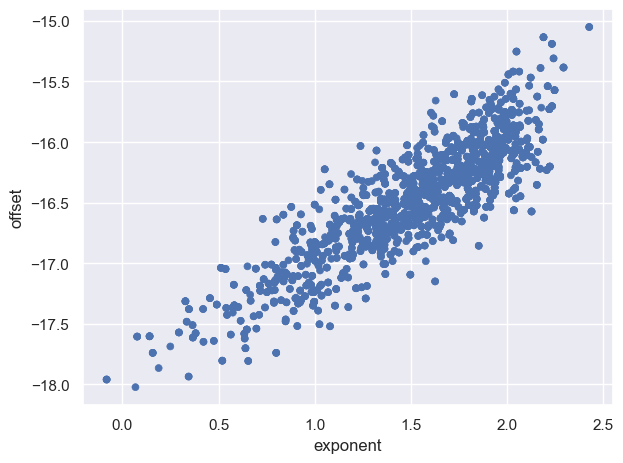

In [25]:
g = (  # have a small dataframne to work with
    da.groupby("regions")
    .mean(dim="roi_names")
    .pipe(
        specparam_xr, stacked_columns=["sub", "regions"], fg=fg, freq_range=freq_range
    )
    .pipe(so.Plot, x="exponent", y="offset")
    .add(so.Dot(pointsize=5))
)
g.show()

Running FOOOFGroup: 100%|██████████| 12172/12172 [01:47<00:00, 113.35it/s]


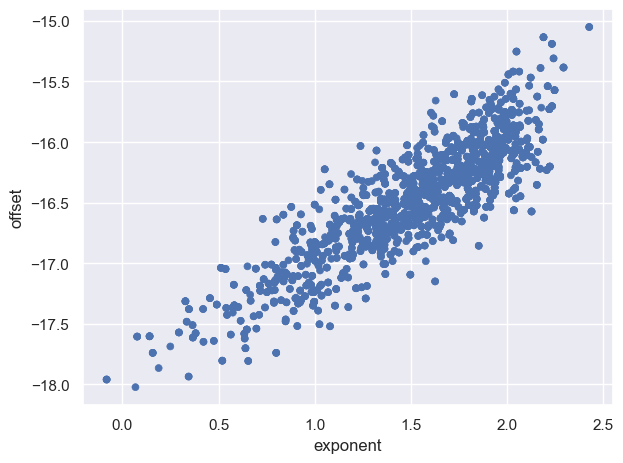

In [26]:
f = (  # have a small dataframne to work with
    da.pipe(
        specparam_xr, stacked_columns=["sub", "roi_names"], fg=fg, freq_range=freq_range
    )
    .pipe(so.Plot, x="exponent", y="offset")
    .add(so.Dot(pointsize=5))
)
g.show()